In [1]:
! pip install -U keras

In [2]:
! pip install -U tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=d41985ed1b5cb0331ee2d5ddde0ccd9cca29e1abc64ea75b4883be19c68e53c8
  Stored in directory: c:\users\yambo\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor


11493376/11490434 [==============================] - 2s 0us/step
(50000, 28, 28) (50000,)


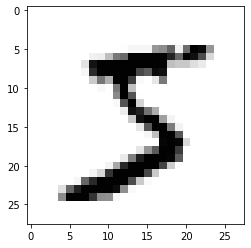

In [3]:
import keras
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

%matplotlib inline

def load_dataset(flatten=False):
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
    # normalize x
    X_train = X_train.astype(float) / 255.
    X_test = X_test.astype(float) / 255.
    
    # Оставим 10000 примеров на валидацию
    X_train, X_val = X_train[:-10000], X_train[-10000:]
    y_train, y_val = y_train[:-10000], y_train[-10000:]
    if flatten:
        X_train = X_train.reshape([X_train.shape[0], -1])
        X_val = X_val.reshape([X_val.shape[0], -1])
        X_test = X_test.reshape([X_test.shape[0], -1])
    return X_train, y_train, X_val, y_val, X_test, y_test


X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
## Размеры
print(X_train.shape, y_train.shape)
## Нарисуем пример
plt.imshow(X_train[0], cmap="Greys");

In [4]:
## Сделаем объекты плоскими N*28*28 to  N*784

X_train = X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]))

print('Train dimension:');print(X_train.shape)
print('Test dimension:');print(X_test.shape)

## Лейблы нужно сделать One-Hot
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)
print('Train labels dimension:');print(y_train.shape)
print('Test labels dimension:');print(y_test.shape)

Train dimension:
(50000, 784)
Test dimension:
(10000, 784)
Train labels dimension:
(50000, 10)
Test labels dimension:
(10000, 10)


In [5]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(14, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

In [16]:
model.compile(loss='mean_squared_error', optimizer='SGD', 
              metrics=['mean_squared_error'])

In [17]:
model.fit(X_train, y_train, epochs=10, batch_size=10, 
          validation_data=(X_test, y_test))

Epoch 1/10
5000/5000 [==============================] - 4s 758us/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 2/10
5000/5000 [==============================] - 4s 782us/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 3/10
5000/5000 [==============================] - 4s 795us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 4/10
5000/5000 [==============================] - 4s 791us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 5/10
5000/5000 [==============================] - 4s 781us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 6/10
5000/5000 [==============================] - 4s 787us/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoc

# Задание
1. Выбрать верный loss
2. Добавить accuracy как оценку качества
3. Исследовать изменение качества при
        3.1. Изменении числа слоев
        3.2. Изменении числа нейронов
        3.3. Изменение функции активации
3. Исследовать параметры SGD, сделать выводы

```
tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD", **kwargs
)
```

## Поставим accuracy и изменим лосс на categorical_crossentropy, так так mean_square_error подходит для задач регрессии, а не многоклассовой классификации

In [27]:
model = Sequential()
model.add(Dense(14, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='SGD', 
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=10, 
          validation_data=(X_test, y_test))

Epoch 1/10
5000/5000 [==============================] - 4s 863us/step - loss: 0.6232 - accuracy: 0.8112 - val_loss: 0.3301 - val_accuracy: 0.9064
Epoch 2/10
5000/5000 [==============================] - 4s 745us/step - loss: 0.3168 - accuracy: 0.9080 - val_loss: 0.2815 - val_accuracy: 0.9186
Epoch 3/10
5000/5000 [==============================] - 4s 771us/step - loss: 0.2730 - accuracy: 0.9203 - val_loss: 0.2581 - val_accuracy: 0.9273
Epoch 4/10
5000/5000 [==============================] - 4s 780us/step - loss: 0.2459 - accuracy: 0.9292 - val_loss: 0.2294 - val_accuracy: 0.9333
Epoch 5/10
5000/5000 [==============================] - 4s 760us/step - loss: 0.2267 - accuracy: 0.9339 - val_loss: 0.2168 - val_accuracy: 0.9381
Epoch 6/10
5000/5000 [==============================] - 4s 820us/step - loss: 0.2119 - accuracy: 0.9383 - val_loss: 0.2162 - val_accuracy: 0.9371
Epoch 7/10
5000/5000 [==============================] - 4s 811us/step - loss: 0.2021 - accuracy: 0.9414 - val_loss: 0.2189 -

## Изменим число слоев

In [26]:
model = Sequential()
model.add(Dense(14, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='SGD', 
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=10, 
          validation_data=(X_test, y_test))

Epoch 1/10
5000/5000 [==============================] - 4s 839us/step - loss: 0.7173 - accuracy: 0.7723 - val_loss: 0.3269 - val_accuracy: 0.9069
Epoch 2/10
5000/5000 [==============================] - 4s 839us/step - loss: 0.3034 - accuracy: 0.9126 - val_loss: 0.2735 - val_accuracy: 0.9166
Epoch 3/10
5000/5000 [==============================] - 4s 812us/step - loss: 0.2376 - accuracy: 0.9307 - val_loss: 0.2346 - val_accuracy: 0.9302
Epoch 4/10
5000/5000 [==============================] - 4s 822us/step - loss: 0.2093 - accuracy: 0.9381 - val_loss: 0.2217 - val_accuracy: 0.9318
Epoch 5/10
5000/5000 [==============================] - 4s 819us/step - loss: 0.1913 - accuracy: 0.9424 - val_loss: 0.1947 - val_accuracy: 0.9419
Epoch 6/10
5000/5000 [==============================] - 4s 810us/step - loss: 0.1780 - accuracy: 0.9476 - val_loss: 0.1902 - val_accuracy: 0.9433
Epoch 7/10
5000/5000 [==============================] - 4s 825us/step - loss: 0.1696 - accuracy: 0.9491 - val_loss: 0.1966 -

In [30]:
model = Sequential()
model.add(Dense(14, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='SGD', 
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=10, 
          validation_data=(X_test, y_test))

Epoch 1/10
5000/5000 [==============================] - 4s 868us/step - loss: 0.7384 - accuracy: 0.7668 - val_loss: 0.3562 - val_accuracy: 0.8888
Epoch 2/10
5000/5000 [==============================] - 4s 865us/step - loss: 0.3221 - accuracy: 0.9043 - val_loss: 0.2721 - val_accuracy: 0.9206
Epoch 3/10
5000/5000 [==============================] - 4s 799us/step - loss: 0.2573 - accuracy: 0.9235 - val_loss: 0.2299 - val_accuracy: 0.9336
Epoch 4/10
5000/5000 [==============================] - 4s 823us/step - loss: 0.2224 - accuracy: 0.9326 - val_loss: 0.2074 - val_accuracy: 0.9380
Epoch 5/10
5000/5000 [==============================] - 4s 769us/step - loss: 0.1980 - accuracy: 0.9405 - val_loss: 0.1918 - val_accuracy: 0.9442
Epoch 6/10
5000/5000 [==============================] - 4s 829us/step - loss: 0.1844 - accuracy: 0.9449 - val_loss: 0.1838 - val_accuracy: 0.9454
Epoch 7/10
5000/5000 [==============================] - 4s 830us/step - loss: 0.1726 - accuracy: 0.9485 - val_loss: 0.1915 -

In [31]:
model = Sequential()
model.add(Dense(14, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='SGD', 
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=10, 
          validation_data=(X_test, y_test))

Epoch 1/10
5000/5000 [==============================] - 4s 852us/step - loss: 0.5795 - accuracy: 0.8229 - val_loss: 0.3233 - val_accuracy: 0.9016
Epoch 2/10
5000/5000 [==============================] - 4s 832us/step - loss: 0.2851 - accuracy: 0.9170 - val_loss: 0.2402 - val_accuracy: 0.9298
Epoch 3/10
5000/5000 [==============================] - 4s 833us/step - loss: 0.2323 - accuracy: 0.9306 - val_loss: 0.2090 - val_accuracy: 0.9397
Epoch 4/10
5000/5000 [==============================] - 4s 821us/step - loss: 0.1996 - accuracy: 0.9409 - val_loss: 0.1874 - val_accuracy: 0.9422
Epoch 5/10
5000/5000 [==============================] - 4s 826us/step - loss: 0.1769 - accuracy: 0.9465 - val_loss: 0.1759 - val_accuracy: 0.9485
Epoch 6/10
5000/5000 [==============================] - 4s 844us/step - loss: 0.1617 - accuracy: 0.9516 - val_loss: 0.1738 - val_accuracy: 0.9478
Epoch 7/10
5000/5000 [==============================] - 4s 816us/step - loss: 0.1493 - accuracy: 0.9543 - val_loss: 0.1667 -

In [33]:
model = Sequential()
model.add(Dense(14, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='SGD', 
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=10, 
          validation_data=(X_test, y_test))

Epoch 1/10
5000/5000 [==============================] - 4s 856us/step - loss: 0.5513 - accuracy: 0.8333 - val_loss: 0.2936 - val_accuracy: 0.9129
Epoch 2/10
5000/5000 [==============================] - 4s 831us/step - loss: 0.2683 - accuracy: 0.9203 - val_loss: 0.2217 - val_accuracy: 0.9356
Epoch 3/10
5000/5000 [==============================] - 4s 861us/step - loss: 0.2177 - accuracy: 0.9339 - val_loss: 0.1972 - val_accuracy: 0.9417
Epoch 4/10
5000/5000 [==============================] - 4s 861us/step - loss: 0.1851 - accuracy: 0.9437 - val_loss: 0.1785 - val_accuracy: 0.9456
Epoch 5/10
5000/5000 [==============================] - 4s 849us/step - loss: 0.1642 - accuracy: 0.9492 - val_loss: 0.1642 - val_accuracy: 0.9500
Epoch 6/10
5000/5000 [==============================] - 4s 861us/step - loss: 0.1489 - accuracy: 0.9541 - val_loss: 0.1571 - val_accuracy: 0.9531
Epoch 7/10
5000/5000 [==============================] - 4s 838us/step - loss: 0.1351 - accuracy: 0.9583 - val_loss: 0.1633 -

In [35]:
model = Sequential()
model.add(Dense(14, input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='SGD', 
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=10, 
          validation_data=(X_test, y_test))

Epoch 1/10
5000/5000 [==============================] - 5s 987us/step - loss: 2.3030 - accuracy: 0.1147 - val_loss: 2.2920 - val_accuracy: 0.2425
Epoch 2/10
5000/5000 [==============================] - 4s 758us/step - loss: 2.2731 - accuracy: 0.1700 - val_loss: 2.2219 - val_accuracy: 0.2609
Epoch 3/10
5000/5000 [==============================] - 4s 713us/step - loss: 1.9219 - accuracy: 0.4088 - val_loss: 1.4469 - val_accuracy: 0.5304
Epoch 4/10
5000/5000 [==============================] - 4s 868us/step - loss: 1.2052 - accuracy: 0.6106 - val_loss: 1.0119 - val_accuracy: 0.6614
Epoch 5/10
5000/5000 [==============================] - 4s 878us/step - loss: 0.8976 - accuracy: 0.7256 - val_loss: 0.7780 - val_accuracy: 0.7800
Epoch 6/10
5000/5000 [==============================] - 4s 885us/step - loss: 0.6993 - accuracy: 0.8094 - val_loss: 0.6092 - val_accuracy: 0.8383
Epoch 7/10
5000/5000 [==============================] - 4s 844us/step - loss: 0.5659 - accuracy: 0.8530 - val_loss: 0.5135 -

In [36]:
model = Sequential()
model.add(Dense(14, input_dim=X_train.shape[1], activation='tanh'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='SGD', 
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=10, 
          validation_data=(X_test, y_test))

Epoch 1/10
5000/5000 [==============================] - 4s 869us/step - loss: 0.4936 - accuracy: 0.8612 - val_loss: 0.2730 - val_accuracy: 0.9228
Epoch 2/10
5000/5000 [==============================] - 4s 876us/step - loss: 0.2563 - accuracy: 0.9236 - val_loss: 0.2355 - val_accuracy: 0.9311
Epoch 3/10
5000/5000 [==============================] - 5s 902us/step - loss: 0.2185 - accuracy: 0.9342 - val_loss: 0.2130 - val_accuracy: 0.9357
Epoch 4/10
5000/5000 [==============================] - 4s 896us/step - loss: 0.1994 - accuracy: 0.9407 - val_loss: 0.1889 - val_accuracy: 0.9420
Epoch 5/10
5000/5000 [==============================] - 5s 905us/step - loss: 0.1834 - accuracy: 0.9457 - val_loss: 0.2013 - val_accuracy: 0.9395
Epoch 6/10
5000/5000 [==============================] - 5s 903us/step - loss: 0.1725 - accuracy: 0.9481 - val_loss: 0.1797 - val_accuracy: 0.9440
Epoch 7/10
5000/5000 [==============================] - 4s 807us/step - loss: 0.1629 - accuracy: 0.9510 - val_loss: 0.1813 -

In [37]:
model = Sequential()
model.add(Dense(14, input_dim=X_train.shape[1], activation='elu'))
model.add(Dense(100, activation='elu'))
model.add(Dense(100, activation='elu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='SGD', 
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=10, 
          validation_data=(X_test, y_test))

Epoch 1/10
5000/5000 [==============================] - 4s 876us/step - loss: 0.4592 - accuracy: 0.8669 - val_loss: 0.2700 - val_accuracy: 0.9213
Epoch 2/10
5000/5000 [==============================] - 5s 910us/step - loss: 0.2466 - accuracy: 0.9256 - val_loss: 0.2148 - val_accuracy: 0.9354
Epoch 3/10
5000/5000 [==============================] - 5s 928us/step - loss: 0.2002 - accuracy: 0.9389 - val_loss: 0.1823 - val_accuracy: 0.9448
Epoch 4/10
5000/5000 [==============================] - 4s 790us/step - loss: 0.1732 - accuracy: 0.9479 - val_loss: 0.1603 - val_accuracy: 0.9516
Epoch 5/10
5000/5000 [==============================] - 4s 868us/step - loss: 0.1561 - accuracy: 0.9528 - val_loss: 0.1652 - val_accuracy: 0.9500
Epoch 6/10
5000/5000 [==============================] - 4s 888us/step - loss: 0.1442 - accuracy: 0.9563 - val_loss: 0.1483 - val_accuracy: 0.9541
Epoch 7/10
5000/5000 [==============================] - 4s 861us/step - loss: 0.1341 - accuracy: 0.9596 - val_loss: 0.1439 -

## Исследуем параметры SGD

In [53]:
import tensorflow as tf

opt=tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD"
)

In [54]:
model = Sequential()
model.add(Dense(14, input_dim=X_train.shape[1], activation='tanh'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=opt, 
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=10, 
          validation_data=(X_test, y_test))

Epoch 1/10
5000/5000 [==============================] - 5s 917us/step - loss: 0.4914 - accuracy: 0.8625 - val_loss: 0.2667 - val_accuracy: 0.9251
Epoch 2/10
5000/5000 [==============================] - 4s 839us/step - loss: 0.2554 - accuracy: 0.9255 - val_loss: 0.2296 - val_accuracy: 0.9335
Epoch 3/10
5000/5000 [==============================] - 4s 852us/step - loss: 0.2148 - accuracy: 0.9360 - val_loss: 0.1976 - val_accuracy: 0.9412
Epoch 4/10
5000/5000 [==============================] - 4s 859us/step - loss: 0.1918 - accuracy: 0.9433 - val_loss: 0.1955 - val_accuracy: 0.9416
Epoch 5/10
5000/5000 [==============================] - 4s 851us/step - loss: 0.1764 - accuracy: 0.9479 - val_loss: 0.1875 - val_accuracy: 0.9441
Epoch 6/10
5000/5000 [==============================] - 4s 863us/step - loss: 0.1654 - accuracy: 0.9511 - val_loss: 0.1789 - val_accuracy: 0.9450
Epoch 7/10
5000/5000 [==============================] - 4s 864us/step - loss: 0.1565 - accuracy: 0.9529 - val_loss: 0.1764 -

In [52]:
opt=tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.0, nesterov=True, name="SGD"
)

model = Sequential()
model.add(Dense(14, input_dim=X_train.shape[1], activation='tanh'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=opt, 
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=10, 
          validation_data=(X_test, y_test))

Epoch 1/10
5000/5000 [==============================] - 5s 909us/step - loss: 0.4894 - accuracy: 0.8611 - val_loss: 0.3000 - val_accuracy: 0.9128
Epoch 2/10
5000/5000 [==============================] - 5s 944us/step - loss: 0.2692 - accuracy: 0.9206 - val_loss: 0.2403 - val_accuracy: 0.9288
Epoch 3/10
5000/5000 [==============================] - 5s 901us/step - loss: 0.2275 - accuracy: 0.9328 - val_loss: 0.2249 - val_accuracy: 0.9363
Epoch 4/10
5000/5000 [==============================] - 5s 949us/step - loss: 0.2047 - accuracy: 0.9388 - val_loss: 0.2048 - val_accuracy: 0.9390
Epoch 5/10
5000/5000 [==============================] - 4s 871us/step - loss: 0.1874 - accuracy: 0.9442 - val_loss: 0.1966 - val_accuracy: 0.9417
Epoch 6/10
5000/5000 [==============================] - 4s 882us/step - loss: 0.1760 - accuracy: 0.9469 - val_loss: 0.1997 - val_accuracy: 0.9396
Epoch 7/10
5000/5000 [==============================] - 4s 832us/step - loss: 0.1655 - accuracy: 0.9500 - val_loss: 0.2014 -

In [51]:
opt=tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=1.0, nesterov=True, name="SGD"
)

model = Sequential()
model.add(Dense(14, input_dim=X_train.shape[1], activation='tanh'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=opt, 
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=10, 
          validation_data=(X_test, y_test))

Epoch 1/10
5000/5000 [==============================] - 5s 987us/step - loss: 3.0909 - accuracy: 0.1951 - val_loss: 2.8454 - val_accuracy: 0.1522
Epoch 2/10
5000/5000 [==============================] - 5s 927us/step - loss: 3.2746 - accuracy: 0.1313 - val_loss: 3.5571 - val_accuracy: 0.1454
Epoch 3/10
5000/5000 [==============================] - 4s 873us/step - loss: 3.1244 - accuracy: 0.1339 - val_loss: 2.7903 - val_accuracy: 0.1317
Epoch 4/10
5000/5000 [==============================] - 5s 915us/step - loss: 3.6090 - accuracy: 0.1310 - val_loss: 3.4083 - val_accuracy: 0.1004
Epoch 5/10
5000/5000 [==============================] - 4s 880us/step - loss: 3.5755 - accuracy: 0.1322 - val_loss: 4.0521 - val_accuracy: 0.1507
Epoch 6/10
5000/5000 [==============================] - 4s 879us/step - loss: 3.7147 - accuracy: 0.1329 - val_loss: 2.9560 - val_accuracy: 0.1714
Epoch 7/10
5000/5000 [==============================] - 5s 922us/step - loss: 3.9294 - accuracy: 0.1325 - val_loss: 3.3448 -

In [55]:
opt=tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.1, nesterov=True, name="SGD"
)

model = Sequential()
model.add(Dense(14, input_dim=X_train.shape[1], activation='tanh'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=opt, 
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=10, 
          validation_data=(X_test, y_test))

Epoch 1/10
5000/5000 [==============================] - 5s 947us/step - loss: 0.4735 - accuracy: 0.8674 - val_loss: 0.2832 - val_accuracy: 0.9192
Epoch 2/10
5000/5000 [==============================] - 5s 963us/step - loss: 0.2537 - accuracy: 0.9251 - val_loss: 0.2270 - val_accuracy: 0.9334
Epoch 3/10
5000/5000 [==============================] - 5s 969us/step - loss: 0.2127 - accuracy: 0.9366 - val_loss: 0.2017 - val_accuracy: 0.9381
Epoch 4/10
5000/5000 [==============================] - 5s 934us/step - loss: 0.1896 - accuracy: 0.9428 - val_loss: 0.1938 - val_accuracy: 0.9393
Epoch 5/10
5000/5000 [==============================] - 5s 917us/step - loss: 0.1743 - accuracy: 0.9469 - val_loss: 0.1852 - val_accuracy: 0.9431
Epoch 6/10
5000/5000 [==============================] - 5s 935us/step - loss: 0.1615 - accuracy: 0.9517 - val_loss: 0.1759 - val_accuracy: 0.9455
Epoch 7/10
5000/5000 [==============================] - 5s 957us/step - loss: 0.1532 - accuracy: 0.9533 - val_loss: 0.1838 -

In [57]:
opt=tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.1, nesterov=False, name="SGD"
)

model = Sequential()
model.add(Dense(14, input_dim=X_train.shape[1], activation='tanh'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=opt, 
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=10, 
          validation_data=(X_test, y_test))

Epoch 1/10
5000/5000 [==============================] - 5s 902us/step - loss: 0.4775 - accuracy: 0.8637 - val_loss: 0.2775 - val_accuracy: 0.9181
Epoch 2/10
5000/5000 [==============================] - 5s 914us/step - loss: 0.2553 - accuracy: 0.9250 - val_loss: 0.2239 - val_accuracy: 0.9327
Epoch 3/10
5000/5000 [==============================] - 4s 890us/step - loss: 0.2160 - accuracy: 0.9354 - val_loss: 0.2089 - val_accuracy: 0.9379
Epoch 4/10
5000/5000 [==============================] - 5s 914us/step - loss: 0.1950 - accuracy: 0.9411 - val_loss: 0.1957 - val_accuracy: 0.9394
Epoch 5/10
5000/5000 [==============================] - 5s 926us/step - loss: 0.1794 - accuracy: 0.9461 - val_loss: 0.1911 - val_accuracy: 0.9428
Epoch 6/10
5000/5000 [==============================] - 4s 889us/step - loss: 0.1674 - accuracy: 0.9485 - val_loss: 0.1944 - val_accuracy: 0.9417
Epoch 7/10
5000/5000 [==============================] - 5s 901us/step - loss: 0.1591 - accuracy: 0.9518 - val_loss: 0.1862 -

## Вывод:
### Увеличение количества слоев и количества нейронов повышают качество, самой удобной функцией активации оказалась rely, tanh показал почти такие же результаты, sigmoid значительно хуже. При изменении параметров SGD, установка слишком большого momentum значительно ухудшает качество, Nesterov сильно на качество не повлиял